In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

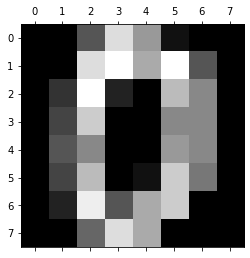

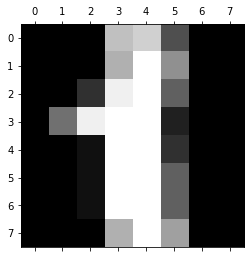

In [3]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [4]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['target'],axis='columns')
X

Y = digits.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [9]:
len(X_test)

719

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)

In [11]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20)

In [12]:
model.score(X_test,Y_test)

0.96105702364395

In [13]:
model.predict(digits.data[[232]])

array([6])

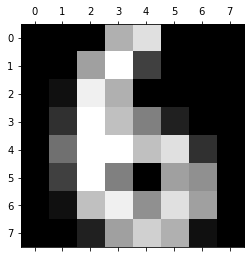

In [14]:
plt.matshow(digits.images[232])

In [15]:
Y_predicted = model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(Y_test,Y_predicted)
cm

array([[72,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 63,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 69,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 76,  0,  0,  0,  3,  1,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1, 80,  1,  0,  1,  3],
       [ 1,  0,  0,  0,  0,  0, 71,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 79,  0,  0],
       [ 0,  0,  1,  1,  0,  2,  0,  1, 59,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  1, 64]])

Text(69.0, 0.5, 'Truth')

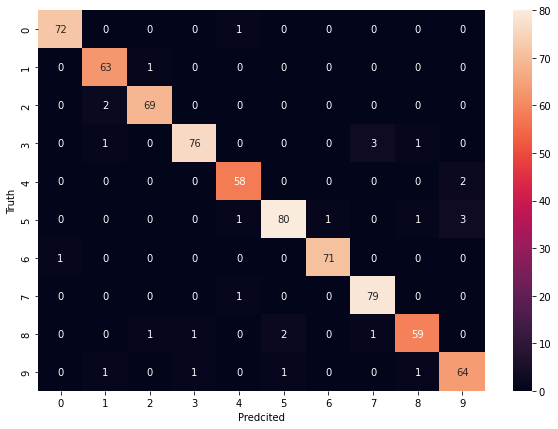

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predcited')
plt.ylabel('Truth')